<class 'pandas.core.frame.DataFrame'>
Int64Index: 156639 entries, 0 to 156638
Data columns (total 15 columns):
address         156639 non-null object
attributes      156639 non-null object
business_id     156639 non-null object
categories      156639 non-null object
city            156639 non-null object
hours           156639 non-null object
is_open         156639 non-null int64
latitude        156638 non-null float64
longitude       156638 non-null float64
name            156639 non-null object
neighborhood    156639 non-null object
postal_code     156639 non-null object
review_count    156639 non-null int64
stars           156639 non-null float64
state           156639 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 19.1+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 156638 entries, 0 to 156638
Data columns (total 15 columns):
address         156638 non-null object
attributes      156638 non-null object
business_id     156638 non-null object
categories 

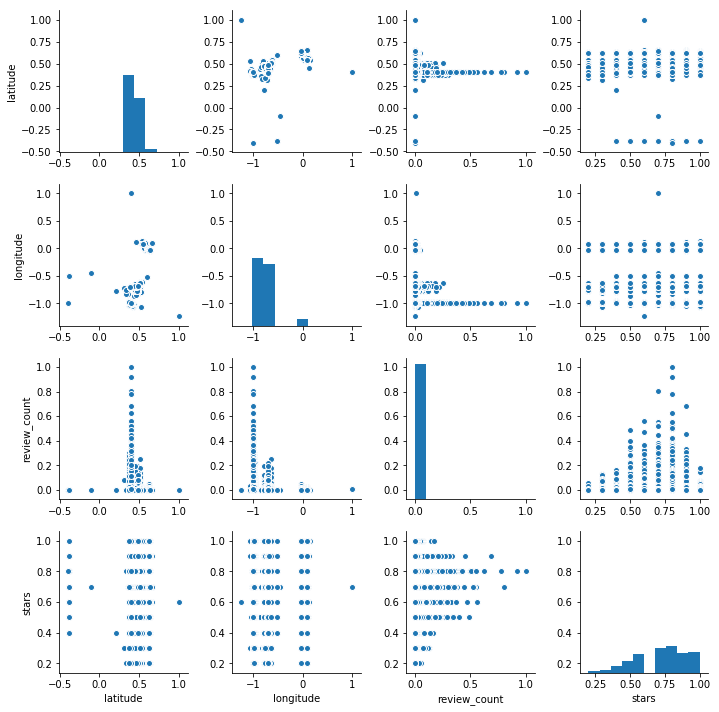

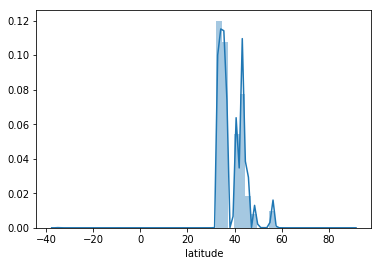

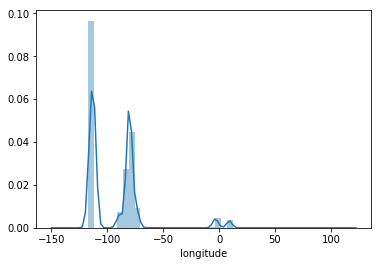

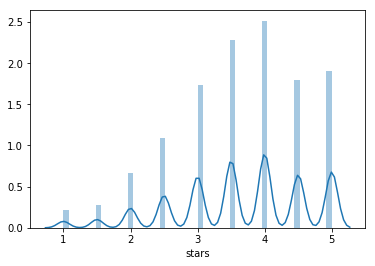

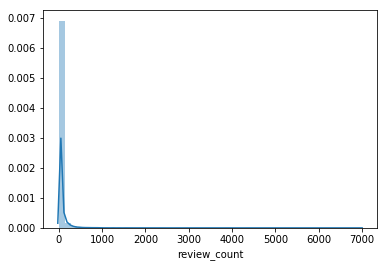

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

business_df = pd.read_json('/Users/raghavnyati/Desktop/dataset/business.json',lines=True)
business_df.info()

business_df = business_df.dropna()

business_df['review_count']=business_df['review_count'].fillna(0)
business_df['stars']=business_df['stars'].fillna(0)

business_df.describe()
stars = business_df.groupby('stars').mean()
stars.corr()

business_df.info()

numeric_features = business_df.loc[:, ['latitude', 'longitude', 'review_count', 'stars']]
numeric_features_standardized = (numeric_features)/numeric_features.max()
ax = sns.pairplot(numeric_features_standardized)
plt.show()

ax = sns.distplot(business_df['latitude'])
plt.show()
ax = sns.distplot(business_df['longitude'])
plt.show()
ax = sns.distplot(business_df['stars'])
plt.show()
ax = sns.distplot(business_df['review_count'])
plt.show()

In [2]:
business_df["stars"].value_counts()

4.0    31529
3.5    28610
5.0    23818
4.5    22557
3.0    21814
2.5    13730
2.0     8331
1.5     3516
1.0     2733
Name: stars, dtype: int64

In [3]:
business_df = business_df.rename(columns={'id': 'business_id'})
business_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156638 entries, 0 to 156638
Data columns (total 15 columns):
address         156638 non-null object
attributes      156638 non-null object
business_id     156638 non-null object
categories      156638 non-null object
city            156638 non-null object
hours           156638 non-null object
is_open         156638 non-null int64
latitude        156638 non-null float64
longitude       156638 non-null float64
name            156638 non-null object
neighborhood    156638 non-null object
postal_code     156638 non-null object
review_count    156638 non-null int64
stars           156638 non-null float64
state           156638 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 19.1+ MB


In [4]:
import pandas as pd

from pandas.io.json import json_normalize #package for flattening json in pandas df

with open('/Users/raghavnyati/Desktop/dataset/checkin.json', 'rb') as f:
    data = f.readlines()

data = map(lambda x: x.rstrip(), data)
data_json_str = "[" + ','.join(data) + "]"

data_df = pd.read_json(data_json_str)
print data_df["time"]

0         {u'Monday': {u'19:00': 1, u'14:00': 1, u'12:00...
1         {u'Sunday': {u'19:00': 1}, u'Saturday': {u'16:...
2         {u'Thursday': {u'0:00': 1}, u'Saturday': {u'16...
3         {u'Monday': {u'19:00': 1, u'21:00': 1, u'17:00...
4         {u'Saturday': {u'23:00': 1}, u'Thursday': {u'1...
5         {u'Friday': {u'13:00': 1}, u'Saturday': {u'11:...
6         {u'Monday': {u'0:00': 1}, u'Tuesday': {u'12:00...
7         {u'Tuesday': {u'23:00': 2, u'17:00': 1, u'1:00...
8         {u'Monday': {u'23:00': 1, u'10:00': 1}, u'Tues...
9                              {u'Thursday': {u'18:00': 1}}
10        {u'Saturday': {u'22:00': 1, u'15:00': 1, u'20:...
11        {u'Monday': {u'23:00': 2, u'1:00': 1}, u'Tuesd...
12        {u'Monday': {u'21:00': 5, u'22:00': 1, u'17:00...
13        {u'Monday': {u'20:00': 1}, u'Thursday': {u'15:...
14        {u'Tuesday': {u'12:00': 1, u'15:00': 1, u'18:0...
15        {u'Monday': {u'23:00': 2, u'21:00': 1, u'22:00...
16        {u'Tuesday': {u'22:00': 1}, u'

In [5]:
temp = []
i = 0
for days in data_df["time"]:
    count = 0
    for key, value in days.iteritems():
        for k1, v1 in value.iteritems():
            count = count + int(v1)
    temp.append(count)

data_df["checkin_count"] = temp
            
print data_df["checkin_count"].unique()
data_df.info()

[ 113    7    4 ..., 2340 1358 6016]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 135148 entries, 0 to 135147
Data columns (total 3 columns):
business_id      135148 non-null object
time             135148 non-null object
checkin_count    135148 non-null int64
dtypes: int64(1), object(2)
memory usage: 4.1+ MB


In [6]:
df_merged = business_df.merge(data_df, on=('business_id'), suffixes=('_l', '_r'))
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135147 entries, 0 to 135146
Data columns (total 17 columns):
address          135147 non-null object
attributes       135147 non-null object
business_id      135147 non-null object
categories       135147 non-null object
city             135147 non-null object
hours            135147 non-null object
is_open          135147 non-null int64
latitude         135147 non-null float64
longitude        135147 non-null float64
name             135147 non-null object
neighborhood     135147 non-null object
postal_code      135147 non-null object
review_count     135147 non-null int64
stars            135147 non-null float64
state            135147 non-null object
time             135147 non-null object
checkin_count    135147 non-null int64
dtypes: float64(3), int64(3), object(11)
memory usage: 18.6+ MB


In [7]:
new_df = df_merged[['business_id','review_count', 'stars', 'checkin_count', 'city', 'state', 'neighborhood', 'categories']]
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135147 entries, 0 to 135146
Data columns (total 8 columns):
business_id      135147 non-null object
review_count     135147 non-null int64
stars            135147 non-null float64
checkin_count    135147 non-null int64
city             135147 non-null object
state            135147 non-null object
neighborhood     135147 non-null object
categories       135147 non-null object
dtypes: float64(1), int64(2), object(5)
memory usage: 9.3+ MB


In [8]:
new_df.stars = new_df.stars.round()

/usr/local/lib/python2.7/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [9]:
new_df["stars"].value_counts()

4.0    75055
2.0    22159
3.0    20111
5.0    16305
1.0     1517
Name: stars, dtype: int64

In [30]:
new_df['review_count']=new_df['review_count'].fillna(0)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
cols_to_norm = ['review_count', 'checkin_count']
new_df[cols_to_norm] = new_df[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [32]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
new_df['state'] = label_encoder.fit_transform(new_df['state'])
print new_df

                   business_id  review_count  stars  checkin_count  \
0       YDf95gJZaq05wvo7hTQbbQ      0.002007    2.0       0.001002   
1       mLwM-h2YhXl2NCgdS84_Bw      0.000143    4.0       0.000039   
2       v2WhjAB3PIBA8J8VxG3wEg      0.000573    4.0       0.000095   
3       duHFBe87uNSXImQmvBh87Q      0.001003    4.0       0.000403   
4       uUEMrhJiL1a1pCA_I1SU7Q      0.004587    5.0       0.000513   
5       2eJEUJIP54tex7T9YOcLSw      0.002294    5.0       0.000063   
6       fEylCY3UEH8YJ0Xa7lu6lA      0.001864    2.0       0.000284   
7       kFtuYklkAIlmYw8RZAieGw      0.000573    5.0       0.000016   
8       NqiQdFa93wzUJGo29NbTPQ      0.000717    5.0       0.000166   
9       N9BN9ldVl1FNzcB9_eAstw      0.001433    4.0       0.000387   
10      6s3z3TlpHOIecuSyPEOp7A      0.000573    4.0       0.000000   
11      n33Izvzk_z9_51H6NsQF-A      0.002580    2.0       0.002155   
12      m06OZRFTaKKi6U0omfLq4g      0.005447    4.0       0.000047   
13      SDMRxmcKPNt1

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
label_encoder = preprocessing.LabelEncoder()
new_df['city'] = label_encoder.fit_transform(new_df['city'])
print new_df

                   business_id  review_count  stars  checkin_count  city  \
0       YDf95gJZaq05wvo7hTQbbQ      0.002007    2.0       0.001002   662   
1       mLwM-h2YhXl2NCgdS84_Bw      0.000143    4.0       0.000039   127   
2       v2WhjAB3PIBA8J8VxG3wEg      0.000573    4.0       0.000095   850   
3       duHFBe87uNSXImQmvBh87Q      0.001003    4.0       0.000403   618   
4       uUEMrhJiL1a1pCA_I1SU7Q      0.004587    5.0       0.000513   618   
5       2eJEUJIP54tex7T9YOcLSw      0.002294    5.0       0.000063   618   
6       fEylCY3UEH8YJ0Xa7lu6lA      0.001864    2.0       0.000284   632   
7       kFtuYklkAIlmYw8RZAieGw      0.000573    5.0       0.000016   448   
8       NqiQdFa93wzUJGo29NbTPQ      0.000717    5.0       0.000166   263   
9       N9BN9ldVl1FNzcB9_eAstw      0.001433    4.0       0.000387   371   
10      6s3z3TlpHOIecuSyPEOp7A      0.000573    4.0       0.000000   759   
11      n33Izvzk_z9_51H6NsQF-A      0.002580    2.0       0.002155   461   
12      m06O

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [34]:
label_encoder = preprocessing.LabelEncoder()
new_df['neighborhood'] = label_encoder.fit_transform(new_df['neighborhood'])
print new_df

                   business_id  review_count  stars  checkin_count  city  \
0       YDf95gJZaq05wvo7hTQbbQ      0.002007    2.0       0.001002   662   
1       mLwM-h2YhXl2NCgdS84_Bw      0.000143    4.0       0.000039   127   
2       v2WhjAB3PIBA8J8VxG3wEg      0.000573    4.0       0.000095   850   
3       duHFBe87uNSXImQmvBh87Q      0.001003    4.0       0.000403   618   
4       uUEMrhJiL1a1pCA_I1SU7Q      0.004587    5.0       0.000513   618   
5       2eJEUJIP54tex7T9YOcLSw      0.002294    5.0       0.000063   618   
6       fEylCY3UEH8YJ0Xa7lu6lA      0.001864    2.0       0.000284   632   
7       kFtuYklkAIlmYw8RZAieGw      0.000573    5.0       0.000016   448   
8       NqiQdFa93wzUJGo29NbTPQ      0.000717    5.0       0.000166   263   
9       N9BN9ldVl1FNzcB9_eAstw      0.001433    4.0       0.000387   371   
10      6s3z3TlpHOIecuSyPEOp7A      0.000573    4.0       0.000000   759   
11      n33Izvzk_z9_51H6NsQF-A      0.002580    2.0       0.002155   461   
12      m06O

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [35]:
new_df.drop(['neighborhood'], axis=1, inplace=True)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [36]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135147 entries, 0 to 135146
Data columns (total 7 columns):
business_id      135147 non-null object
review_count     135147 non-null float64
stars            135147 non-null float64
checkin_count    135147 non-null float64
city             135147 non-null int64
state            135147 non-null int64
categories       135147 non-null object
dtypes: float64(3), int64(2), object(2)
memory usage: 8.2+ MB


In [37]:
X = new_df[['review_count', 'checkin_count', 'city', 'state']]
y = new_df[['stars']]

X.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135147 entries, 0 to 135146
Data columns (total 4 columns):
review_count     135147 non-null float64
checkin_count    135147 non-null float64
city             135147 non-null int64
state            135147 non-null int64
dtypes: float64(2), int64(2)
memory usage: 5.2 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 135147 entries, 0 to 135146
Data columns (total 1 columns):
stars    135147 non-null float64
dtypes: float64(1)
memory usage: 2.1 MB


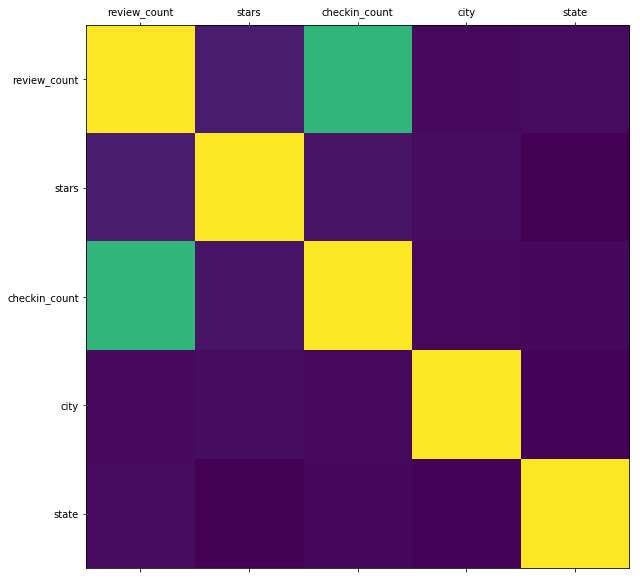

In [38]:
corr = new_df.corr()

fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns);

plt.show()

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

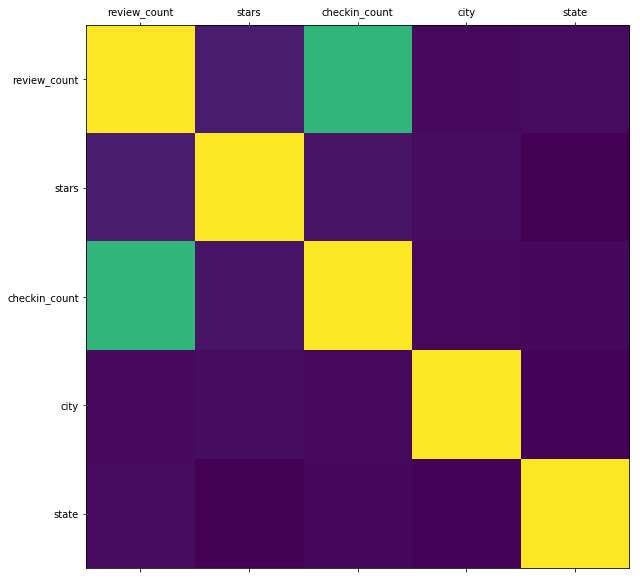

In [40]:
corr = new_df.corr()

fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns);

plt.show()

In [41]:
from sklearn.model_selection import train_test_split

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [45]:
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
   
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

regression_model.score(X_test, y_test)

from sklearn.metrics import mean_squared_error
y_predict = regression_model.predict(X_test)
regression_model_mse = mean_squared_error(y_predict, y_test)
regression_model_mse

import math
math.sqrt(regression_model_mse)

The intercept for our model is 3.60766345324


0.9329173974633963

In [46]:
from sklearn import tree

model = tree.DecisionTreeClassifier()

model.fit(X_train, y_train)
y_predict = model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

from sklearn.metrics import confusion_matrix
pd.DataFrame(
    confusion_matrix(y_test, y_predict)
)

,0,1,2,3,4
0,6,49,40,206,75
1,44,995,659,3262,502
2,29,879,783,2975,344
3,92,2820,2439,12061,1377
4,28,600,357,2410,755


In [47]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=30, max_depth=10, random_state=1)
random_forest.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_predict = random_forest.predict(X_test)
accuracy_score(y_test, y_predict)

from sklearn.metrics import confusion_matrix
pd.DataFrame(
    confusion_matrix(y_test, y_predict)
)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


,0,1,2,3,4
0,0,0,0,320,56
1,0,3,0,5296,163
2,0,5,1,4937,67
3,1,8,3,18400,377
4,0,3,0,3710,437


In [48]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_predict = neigh.predict(X_test)
accuracy_score(y_test, y_predict)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.42667298073223431

In [49]:
from sklearn.linear_model import RidgeClassifier
ridge = RidgeClassifier(alpha=1.0, solver='auto')
ridge.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_predict = ridge.predict(X_test)
accuracy_score(y_test, y_predict)

/usr/local/lib/python2.7/site-packages/sklearn/linear_model/ridge.py:810: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.55604226477639329

In [50]:
from sklearn.neighbors import NearestCentroid
cneigh = NearestCentroid(metric='euclidean', shrink_threshold=None)
cneigh.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_predict = cneigh.predict(X_test)
accuracy_score(y_test, y_predict)

/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.22079498031787373

In [51]:
from sklearn.neural_network import MLPClassifier
neural = MLPClassifier(hidden_layer_sizes=(100, ), activation='logistic', alpha=0.001, learning_rate='adaptive')
neural.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_predict = neural.predict(X_test)
accuracy_score(y_test, y_predict)

/usr/local/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.55621984787048273

In [52]:
from sklearn.naive_bayes import BernoulliNB

nb = BernoulliNB()
nb.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_predict = nb.predict(X_test)
accuracy_score(y_test, y_predict)

0.55610145914108977

In [53]:
from sklearn.svm import LinearSVC

svc = LinearSVC(penalty='l2', loss='squared_hinge')
svc.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_predict = svc.predict(X_test)
accuracy_score(y_test, y_predict)

0.55607186195874148

In [54]:
from sklearn.linear_model import LogisticRegressionCV

lr = LogisticRegressionCV(multi_class='multinomial')
lr.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_predict = lr.predict(X_test)
accuracy_score(y_test, y_predict)

0.55610145914108977

In [58]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X, y)

from sklearn.metrics import accuracy_score

y_predict = clf.predict(X_test)
accuracy_score(y_test, y_predict)

0.55613105632343796

In [59]:
from sklearn import svm

clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X, y)

y_predict = clf.predict(X_test)
print accuracy_score(y_test, y_predict)

clf.support_vectors_

0.556131056323


array([[ -1.94311374e-01,  -1.57601128e-01,  -4.69726695e-01,
          4.85161937e-01],
       [ -7.52126491e-04,  -1.51923333e-01,  -4.69726695e-01,
          4.85161937e-01],
       [ -3.00768960e-01,  -1.64698373e-01,   1.48118901e+00,
          8.13325670e-01],
       ..., 
       [ -2.81413036e-01,  -1.63278924e-01,  -4.69726695e-01,
          4.85161937e-01],
       [ -2.13667299e-01,  -1.57601128e-01,  -8.85161773e-01,
         -1.40177953e+00],
       [ -2.91090998e-01,  -1.46245537e-01,   1.48118901e+00,
          8.13325670e-01]])

In [60]:
lin_clf = svm.LinearSVC()
lin_clf.fit(X, y)

y_predict = lin_clf.predict(X_test)
accuracy_score(y_test, y_predict)

0.55610145914108977

In [ ]:
new_df.to_csv('/Users/raghavnyati/Desktop/dataset/yelp_data', sep='\t')

In [ ]:
from sklearn import svm

clf = svm.SVC(kernel='rbf', C=10000.0)
clf.fit(X, y)

from sklearn.metrics import accuracy_score

y_predict = clf.predict(X_test)
accuracy_score(y_test, y_predict)

In [ ]:
temp = []
i = 0
for category in new_df["categories"]:
    if 'Restaurants' in category:
        temp.append(i)
    i += 1
        
print temp

In [ ]:
print new_df.index.tolist()

In [ ]:
rest_df = new_df.iloc[temp]
rest_df.info()
rest_df.to_csv('/Users/raghavnyati/Desktop/dataset/restaurants_data', sep='\t')

In [ ]:
new_list = list(set(reduce(lambda x, y: x+y, rest_df["categories"])))
print new_list

In [ ]:
rest_df.groupby([rest_df['state']]).count()

In [ ]:
rest_df[["state","city","review_count", "checkin_count", "stars"]].plot(kind='hist',subplots=True, figsize=(12, 6),bins=100);

In [ ]:
plt.show()

In [ ]:
rest_df = rest_df.cumsum()

plt.figure(); rest_df.plot();

In [ ]:
rest_df.plot.barh(stacked=True);

In [ ]:
plt.figure();

rest_df.plot.hist(stacked=True, bins=20)